<a href="https://colab.research.google.com/github/SantiagoB07/Noticias/blob/main/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocesamiento sin lematización

In [1]:
import json
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el archivo JSON
with open('Noticias_CompletasGobiernoElTiempo.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extraer los textos de las columnas de opinión y eliminar duplicados
texts = list(dict.fromkeys(
    ' '.join(item['content']) if isinstance(item['content'], list) else item['content']
    for item in data if 'content' in item
))


# Definir stopwords y lematizador
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convertir listas a texto
    if not isinstance(text, str):
        return ''  # Si no es string, devolver cadena vacía

    # Limpieza básica
    text = re.sub(r'\W', ' ', text)  # Elimina caracteres especiales
    text = re.sub(r'\d+', '', text)  # Elimina números
    text = text.lower()  # Convertir a minúsculas

    # Tokenización y limpieza
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Aplicar preprocesamiento a todos los textos sin duplicados
cleaned_texts = [preprocess_text(text) for text in texts]


# Crear un DataFrame con los textos preprocesados
df = pd.DataFrame({'cleaned_text': cleaned_texts})



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
#Eliminar duplicados

import json
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el archivo JSON
with open('Noticias_CompletasGobiernoElTiempo.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extraer los textos de las columnas de opinión y eliminar duplicados
texts = list(set(  # Eliminar duplicados desde el inicio
    ' '.join(item['content']) if isinstance(item['content'], list) else item['content']
    for item in data if 'content' in item
))

# Definir stopwords y lematizador
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convertir listas a texto
    if not isinstance(text, str):
        return ''  # Si no es string, devolver cadena vacía

    # Limpieza básica
    text = re.sub(r'\W', ' ', text)  # Elimina caracteres especiales
    text = re.sub(r'\d+', '', text)  # Elimina números
    text = text.lower()  # Convertir a minúsculas

    # Tokenización y limpieza
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Aplicar preprocesamiento a todos los textos sin duplicados
cleaned_texts = list(set([preprocess_text(text) for text in texts]))  # Eliminar duplicados tras preprocesamiento

# Crear un DataFrame con los textos preprocesados sin duplicados
df = pd.DataFrame({'cleaned_text': cleaned_texts})

# Asegurar que no haya duplicados en el DataFrame
df.drop_duplicates(subset=['cleaned_text'], inplace=True)

# Guardar el DataFrame en un archivo CSV
df.to_csv("noticias_limpias.csv", index=False)

# Mostrar el número total de textos después de la limpieza
print(f"✅ Total de textos después de eliminar duplicados: {len(df)}")

# Mostrar las primeras filas del DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Total de textos después de eliminar duplicados: 96
                                        cleaned_text
0  cargo poderosos casa nariño aterrizaría funcio...
1  presidente gustavo petro aseguró través cuenta...
2  consejo ministros presidente gustavo petro pri...
3  aeropuerto internacional josé maría córdova ri...
4  presidente gustavo petro insistió julio lozano...


In [3]:
# Mostrar los primeros textos preprocesados
for i, text in enumerate(cleaned_texts[:5]):  # Muestra los primeros 5 textos
    print(f"Texto {i+1}: {text}\n")


Texto 1: cargo poderosos casa nariño aterrizaría funcionaria bajo perfil político trata angie lizeth rodríguez asesora ministro salud guillermo alfonso jaramillo reemplazo jorge rojas departamento administrativo presidencia república dapre llegada da tras renuncia rojas semana después posesionarse renunció después tenso consejo ministros martes enero decisión presidente gustavo petro transmitido alocución presidencial salida gobierno dio principalmente diferencias armando benedetti nombrado semana nuevo jefe despacho precisamente según fuentes casa nariño rojas discusión benedetti consejo ministros provocó nueva crisis gabinete deja ahora renuncia tres alto funcionarios según rojas debe haber jefe gabinete jefe despacho juicio distorsiona ejercicio gobierno presidente ministros podemos revisarlo objetivamente llegada rodríguez confirmada fuentes casa nariño todavía sido oficializada deja varias lecturas lado guiño guillermo alfonso jaramillo persona enteron confianza seno casa nariño p

##Analisis de sentimientos con TextBlob

                    Aspect  Average Sentiment  Average Subjectivity
0            gustavo petro           0.010953              0.352828
1        consejo ministros           0.021038              0.339137
2       presidente gustavo           0.009403              0.346344
3         presidente petro           0.011712              0.378931
4        armando benedetti           0.022880              0.342288
5            laura sarabia           0.020168              0.284046
6       redacción política           0.023360              0.348214
7           redes sociales           0.012389              0.343041
8            jefe despacho           0.003755              0.340641
9        primer mandatario           0.040418              0.339368
10             casa nariño           0.055489              0.329092
11            donald trump           0.010033              0.267222
12             jorge rojas           0.012802              0.318844
13          juan sebastián          -0.044883   

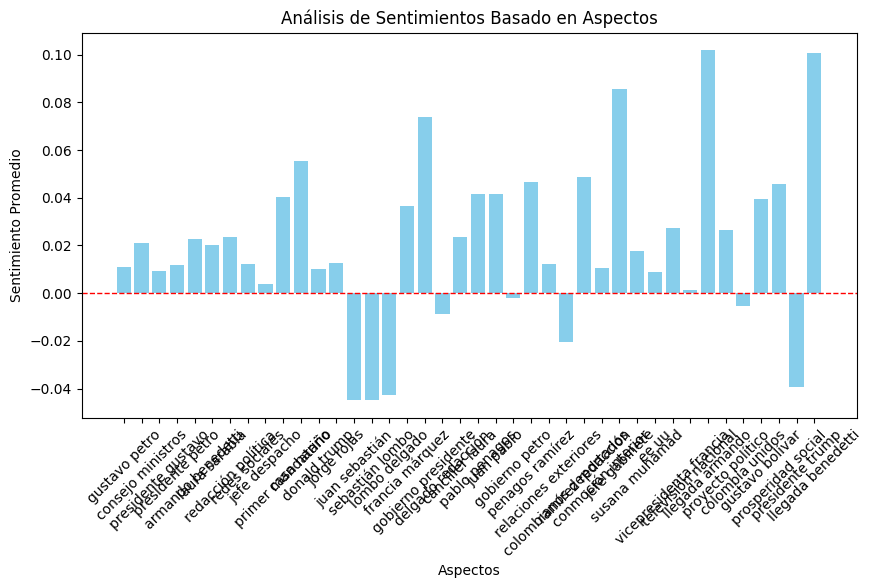

In [4]:

stop_words_spanish = list(stopwords.words('spanish'))

# Aplicar TF-IDF para extraer términos relevantes
vectorizer = TfidfVectorizer(max_features=40, stop_words=stop_words_spanish, ngram_range=(2,2)) #si se quiere trabajar con una sola palabra quitar ngram_range
X = vectorizer.fit_transform(df['cleaned_text'])

# Obtener los términos más importantes
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray().sum(axis=0)

# Crear un diccionario con los términos y sus puntajes
aspect_scores = dict(zip(feature_names, tfidf_scores))

# Convertir a DataFrame
aspects_df = pd.DataFrame(list(aspect_scores.items()), columns=['Aspect', 'Score'])
aspects_df = aspects_df.sort_values(by='Score', ascending=False)

# Análisis de sentimiento basado en aspectos
sentiment_results = []
for aspect in aspects_df['Aspect']:
    aspect_texts = df[df['cleaned_text'].str.contains(aspect, na=False, regex=False)]['cleaned_text']
    polarity_scores = [TextBlob(text).sentiment.polarity for text in aspect_texts]
    subjectivity_scores = [TextBlob(text).sentiment.subjectivity for text in aspect_texts]
    avg_polarity = sum(polarity_scores) / len(polarity_scores) if polarity_scores else 0
    avg_subjectivity = sum(subjectivity_scores) / len(subjectivity_scores) if subjectivity_scores else 0
    sentiment_results.append({'Aspect': aspect, 'Average Sentiment': avg_polarity, 'Average Subjectivity': avg_subjectivity})

# Crear un DataFrame con los resultados del análisis de sentimiento
sentiment_df = pd.DataFrame(sentiment_results)

# Mostrar los datos en la interfaz
print(sentiment_df)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.bar(sentiment_df['Aspect'], sentiment_df['Average Sentiment'], color='skyblue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Aspectos")
plt.ylabel("Sentimiento Promedio")
plt.title("Análisis de Sentimientos Basado en Aspectos")
plt.xticks(rotation=45)
plt.show()


##Analisis de sentimientos con lematización

In [5]:
!pip install spacy
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 59.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


###Preprocesamiento con lematización

In [6]:
import re
import spacy
import pandas as pd

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función de preprocesamiento con lematización usando spaCy
def preprocess_text(text):
    if not isinstance(text, str):
        return []  # Si no es un string, devolver lista vacía

    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\d+', '', text)  # Eliminar números
    doc = nlp(text)  # Procesar texto con spaCy
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # Lematización y eliminación de stopwords
    return words  # Devolver lista de palabras procesadas

# Aplicar preprocesamiento a todos los textos sin duplicados
cleanedLDA_texts = [preprocess_text(text) for text in texts]

# Crear un DataFrame con los textos preprocesados
df = pd.DataFrame({'cleaned_text': cleanedLDA_texts})


In [7]:
# Mostrar los primeros textos preprocesados
for i, text in enumerate(cleanedLDA_texts[:5]):  # Muestra los primeros 5 textos
    print(f"Texto {i+1}: {text}\n")

Texto 1: ['polémica', 'diferendo', 'colombia', 'unidos', 'deportación', 'migrant', 'indocumentado', 'presidente', 'gustavo', 'petro', 'cancillería', 'anunciar', 'llegar', 'traer él', 'forma', 'digno', 'colombia', 'hacer', 'cargo', 'dicho', 'traslado', 'mauricio', 'claver', 'caronir', 'enviar', 'especial', 'presidente', 'trump', 'américa', 'latino', 'proponer', 'asumir', 'inmediato', 'traslado', 'ciudadano', 'colombiano', 'deportado', 'unidos', 'cancillería', 'comunicado', 'presidente', 'gustavo', 'petro', 'ahondar', 'dicho', 'postura', 'diálogo', 'univision', 'seguir', 'mandar', 'avión', 'aumentar', 'número', 'deportado', 'previsible', 'mandar', 'crucero', 'mandatario', 'barco', 'trasladar', 'persona', 'vuelo', 'cuestionar', 'costo', 'difícil', 'condición', 'fiscal', 'país', 'año', 'cerca', 'colombiano', 'deportado', 'mandatario', 'limitar', 'presupuesto', 'constitución', 'priorización', 'dignidad', 'anuncio', 'oficial', 'tiempo', 'preguntar', 'cancillería', 'gasto', 'contemplado', 're

##analisis de sentimientos con lematización por JSON

               Aspect  Average Sentiment  Average Subjectivity
0       gustavo petro           0.005217              0.341602
1  presidente gustavo           0.002933              0.338611
2    consejo ministro           0.004163              0.325495
3  redacción político           0.011216              0.355806
4       laura sarabio           0.021896              0.283407
5    presidente petro           0.016230              0.359447
6     armar benedetti           0.003936              0.341030
7           haber ser           0.010806              0.325262
8         casa nariño           0.027805              0.299424
9       jefe despacho          -0.012257              0.356880


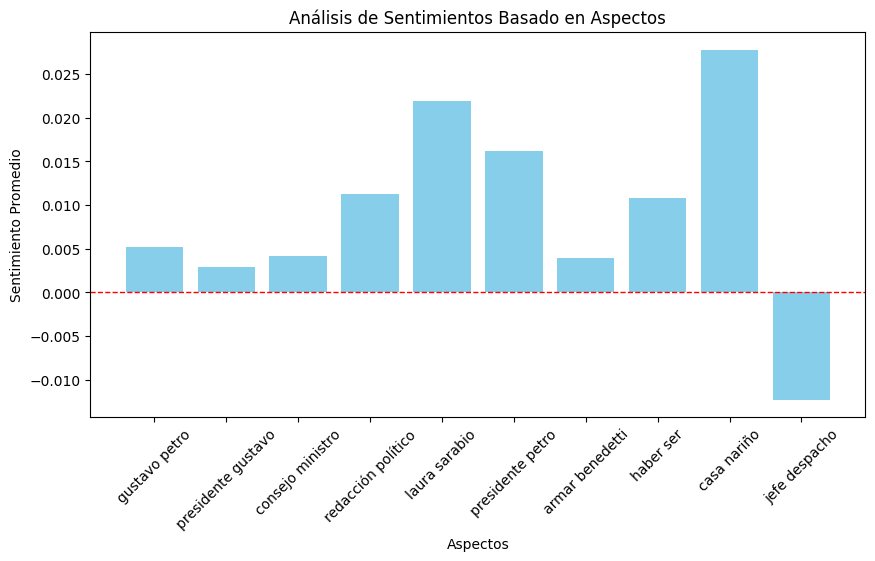

In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Lista de stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))

# Función de preprocesamiento usando spaCy
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\d+', '', text)  # Eliminar números
    doc = nlp(text)  # Procesar texto con spaCy
    words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words_spanish]  # Lematización y stopwords
    return " ".join(words)  # Unir las palabras en una cadena

# Cargar el DataFrame con las noticias (asegúrate de cargar tus datos aquí)
df_noticias = pd.read_json("Noticias_CompletasGobiernoElTiempo.json")  # Reemplaza con el archivo correcto

# Unir el contenido en una sola cadena de texto por noticia
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Aplicar preprocesamiento al contenido de las noticias
df_noticias["cleaned_text"] = df_noticias["text"].apply(preprocess_text)

# Aplicar TF-IDF para extraer términos más relevantes (aspectos)
vectorizer = TfidfVectorizer(max_features=10, stop_words=list(stop_words_spanish), ngram_range=(2,2))
X = vectorizer.fit_transform(df_noticias['cleaned_text'])

# Obtener los términos más importantes
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray().sum(axis=0)

# Crear un DataFrame con los aspectos y sus puntuaciones
aspect_scores = dict(zip(feature_names, tfidf_scores))
aspects_df = pd.DataFrame(list(aspect_scores.items()), columns=['Aspect', 'Score'])
aspects_df = aspects_df.sort_values(by='Score', ascending=False)

# Análisis de sentimientos basado en aspectos
sentiment_results = []
for aspect in aspects_df['Aspect']:
    aspect_texts = df_noticias[df_noticias['cleaned_text'].str.contains(aspect, na=False, regex=False)]['cleaned_text']
    polarity_scores = [TextBlob(text).sentiment.polarity for text in aspect_texts]
    subjectivity_scores = [TextBlob(text).sentiment.subjectivity for text in aspect_texts]

    avg_polarity = sum(polarity_scores) / len(polarity_scores) if polarity_scores else 0
    avg_subjectivity = sum(subjectivity_scores) / len(subjectivity_scores) if subjectivity_scores else 0

    sentiment_results.append({'Aspect': aspect, 'Average Sentiment': avg_polarity, 'Average Subjectivity': avg_subjectivity})

# Crear un DataFrame con los resultados del análisis de sentimiento
sentiment_df = pd.DataFrame(sentiment_results)

# Guardar los resultados en un archivo CSV
sentiment_df.to_csv("sentiment_analysis_results.csv", index=False)

# Mostrar los datos en la terminal
print(sentiment_df)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.bar(sentiment_df['Aspect'], sentiment_df['Average Sentiment'], color='skyblue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Aspectos")
plt.ylabel("Sentimiento Promedio")
plt.title("Análisis de Sentimientos Basado en Aspectos")
plt.xticks(rotation=45)
plt.show()


##Análisis con lematización por noticias de manera individual sin aspectos

                                                link  sentiment_polarity  \
0  https://www.eltiempo.com/politica/gobierno/uno...            0.053333   
1  https://www.eltiempo.com/politica/gobierno/que...            0.000000   
2  https://www.eltiempo.com/politica/gobierno/reu...            0.022222   
3  https://www.eltiempo.com/politica/gobierno/pre...           -0.140000   
4  https://www.eltiempo.com/politica/gobierno/jhe...            0.000000   

   sentiment_subjectivity  
0                0.326667  
1                0.250000  
2                0.102778  
3                0.420000  
4                0.050000  


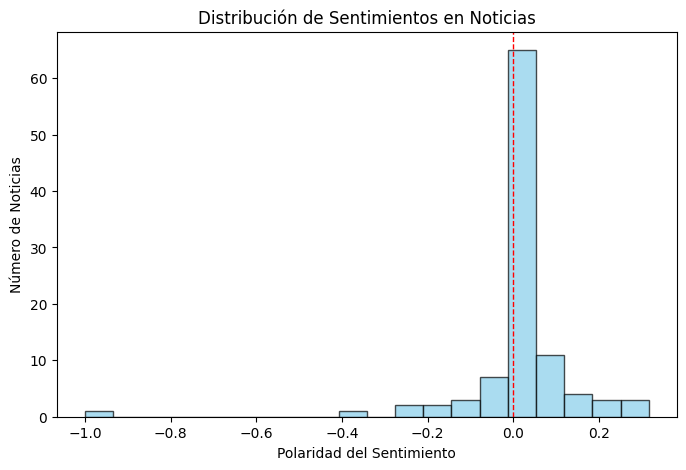

In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
from nltk.corpus import stopwords

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Lista de stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))

# Función de preprocesamiento usando spaCy
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\d+', '', text)  # Eliminar números
    doc = nlp(text)  # Procesar texto con spaCy
    words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words_spanish]  # Lematización y stopwords
    return " ".join(words)  # Unir las palabras en una cadena

# Cargar el JSON con las noticias
df_noticias = pd.read_json("Noticias_CompletasGobiernoElTiempo.json")  # Asegúrate de que el archivo esté en la carpeta correcta

# Unir el contenido en una sola cadena de texto por noticia
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Aplicar preprocesamiento al contenido de las noticias
df_noticias["cleaned_text"] = df_noticias["text"].apply(preprocess_text)

# Aplicar análisis de sentimientos a cada noticia individualmente
df_noticias["sentiment_polarity"] = df_noticias["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_noticias["sentiment_subjectivity"] = df_noticias["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Guardar el resultado con sentimientos por noticia
df_noticias.to_csv("sentiment_analysis_individual.csv", index=False)

# Mostrar los primeros resultados
print(df_noticias[["link", "sentiment_polarity", "sentiment_subjectivity"]].head())

# Graficar distribución de sentimientos
plt.figure(figsize=(8,5))
plt.hist(df_noticias["sentiment_polarity"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Polaridad del Sentimiento")
plt.ylabel("Número de Noticias")
plt.title("Distribución de Sentimientos en Noticias")
plt.show()


##Análisis con lematización por noticias de manera individual basado en aspectos

                                                link            aspect  \
0  https://www.eltiempo.com/politica/gobierno/uno...       casa nariño   
1  https://www.eltiempo.com/politica/gobierno/uno...  consejo ministro   
2  https://www.eltiempo.com/politica/gobierno/uno...         deber ser   
3  https://www.eltiempo.com/politica/gobierno/uno...     gustavo petro   
4  https://www.eltiempo.com/politica/gobierno/uno...       haber decir   

   sentiment_polarity  sentiment_subjectivity  
0            0.053333                0.326667  
1            0.053333                0.326667  
2            0.053333                0.326667  
3            0.053333                0.326667  
4            0.053333                0.326667  


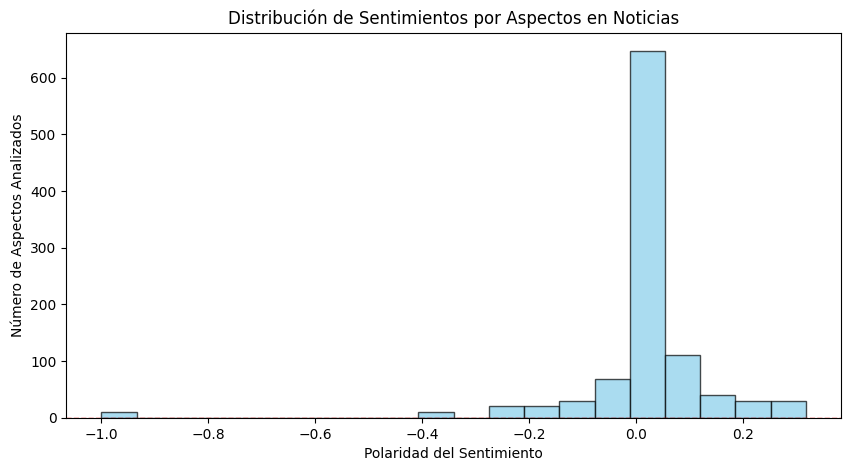

In [10]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Lista de stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))

# Función de preprocesamiento usando spaCy
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\d+', '', text)  # Eliminar números
    doc = nlp(text)  # Procesar texto con spaCy
    words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words_spanish]  # Lematización y stopwords
    return " ".join(words)  # Unir palabras en una cadena

# Cargar el JSON con las noticias
df_noticias = pd.read_json("Noticias_CompletasGobiernoElTiempo.json")  # Asegúrate de que el archivo esté en la carpeta correcta

# Unir el contenido en una sola cadena de texto por noticia
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Aplicar preprocesamiento al contenido de cada noticia
df_noticias["cleaned_text"] = df_noticias["text"].apply(preprocess_text)

# Inicializar lista para almacenar resultados de análisis por noticia
aspect_sentiment_results = []

# Analizar cada noticia individualmente
for index, row in df_noticias.iterrows():
    text = row["cleaned_text"]
    link = row["link"]

    # Extraer aspectos dentro de la noticia usando TF-IDF
    vectorizer = TfidfVectorizer(max_features=10, stop_words=list(stop_words_spanish), ngram_range=(2,2))
    X = vectorizer.fit_transform([text])  # Aplicar solo a la noticia actual
    feature_names = vectorizer.get_feature_names_out()

    # Analizar sentimiento para cada aspecto dentro de la noticia
    for aspect in feature_names:
        if aspect in text:
            aspect_text = text  # Usar todo el texto porque el aspecto está dentro de él
            polarity = TextBlob(aspect_text).sentiment.polarity
            subjectivity = TextBlob(aspect_text).sentiment.subjectivity

            aspect_sentiment_results.append({
                "link": link,
                "aspect": aspect,
                "sentiment_polarity": polarity,
                "sentiment_subjectivity": subjectivity
            })

# Convertir los resultados a un DataFrame
aspect_sentiment_df = pd.DataFrame(aspect_sentiment_results)

# Guardar en CSV
aspect_sentiment_df.to_csv("sentiment_analysis_by_news.csv", index=False)

# Mostrar los primeros resultados
print(aspect_sentiment_df.head())

# Graficar la distribución de sentimientos
plt.figure(figsize=(10, 5))
plt.hist(aspect_sentiment_df["sentiment_polarity"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Polaridad del Sentimiento")
plt.ylabel("Número de Aspectos Analizados")
plt.title("Distribución de Sentimientos por Aspectos en Noticias")
plt.show()


##Hacer el embedding con el analisis basado en aspectos

In [11]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Rutas de los archivos
json_file_path = "Noticias_CompletasGobiernoElTiempo.json"  # Cambia según tu ruta
csv_file_path = "sentiment_analysis_by_news.csv"  # Cambia según tu ruta

# Cargar el JSON con las noticias
df_noticias = pd.read_json(json_file_path)

# Unir el contenido en una sola cadena de texto por noticia
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Cargar el CSV con el análisis de sentimientos basado en aspectos
df_sentiments = pd.read_csv(csv_file_path)

# Fusionar ambos DataFrames usando el enlace como clave
df_combined = df_sentiments.merge(df_noticias[["link", "text"]], on="link", how="left")

# Cargar un modelo preentrenado para embeddings multilingües
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Generar embeddings para cada texto de noticia
embeddings = model.encode(df_combined["text"].tolist())

# Guardar embeddings en un archivo .npy
np.save("embeddings.npy", embeddings)

# Guardar el DataFrame con los datos fusionados para referencia
df_combined.to_csv("combined_data_with_embeddings.csv", index=False)

# Mostrar las primeras filas del DataFrame
print(df_combined.head())

# Confirmar que los embeddings se guardaron correctamente
print(f"Embeddings guardados en 'embeddings.npy'")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                                                link            aspect  \
0  https://www.eltiempo.com/politica/gobierno/uno...       casa nariño   
1  https://www.eltiempo.com/politica/gobierno/uno...  consejo ministro   
2  https://www.eltiempo.com/politica/gobierno/uno...         deber ser   
3  https://www.eltiempo.com/politica/gobierno/uno...     gustavo petro   
4  https://www.eltiempo.com/politica/gobierno/uno...       haber decir   

   sentiment_polarity  sentiment_subjectivity  \
0            0.053333                0.326667   
1            0.053333                0.326667   
2            0.053333                0.326667   
3            0.053333                0.326667   
4            0.053333                0.326667   

                                                text  
0  Varios días después de su salida del Dapre, Jo...  
1  Varios días después de su salida del Dapre, Jo...  
2  Varios días después de su salida del Dapre, Jo...  
3  Varios días después de su salida del 

In [12]:
#Eliminar duplicados
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Rutas de los archivos
json_file_path = "Noticias_CompletasGobiernoElTiempo.json"  # Cambia según tu ruta
csv_file_path = "sentiment_analysis_by_news.csv"  # Cambia según tu ruta

# Cargar el JSON con las noticias
df_noticias = pd.read_json(json_file_path)

# Unir el contenido en una sola cadena de texto por noticia
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Eliminar duplicados en base al contenido de la noticia
df_noticias.drop_duplicates(subset=["text"], inplace=True)

# Cargar el CSV con el análisis de sentimientos basado en aspectos
df_sentiments = pd.read_csv(csv_file_path)

# Fusionar ambos DataFrames usando el enlace como clave
df_combined = df_sentiments.merge(df_noticias[["link", "text"]], on="link", how="left")

# Cargar un modelo preentrenado para embeddings multilingües
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Generar embeddings para cada texto de noticia
embeddings = model.encode(df_combined["text"].tolist())

# Guardar embeddings en un archivo .npy
np.save("embeddings.npy", embeddings)

# Guardar el DataFrame con los datos fusionados para referencia
df_combined.to_csv("combined_data_with_embeddings.csv", index=False)

# Mostrar las primeras filas del DataFrame
print(df_combined.head())

# Confirmar que los embeddings se guardaron correctamente
print(f"✅ Embeddings guardados en 'embeddings.npy'")


                                                link            aspect  \
0  https://www.eltiempo.com/politica/gobierno/uno...       casa nariño   
1  https://www.eltiempo.com/politica/gobierno/uno...  consejo ministro   
2  https://www.eltiempo.com/politica/gobierno/uno...         deber ser   
3  https://www.eltiempo.com/politica/gobierno/uno...     gustavo petro   
4  https://www.eltiempo.com/politica/gobierno/uno...       haber decir   

   sentiment_polarity  sentiment_subjectivity  \
0            0.053333                0.326667   
1            0.053333                0.326667   
2            0.053333                0.326667   
3            0.053333                0.326667   
4            0.053333                0.326667   

                                                text  
0  Varios días después de su salida del Dapre, Jo...  
1  Varios días después de su salida del Dapre, Jo...  
2  Varios días después de su salida del Dapre, Jo...  
3  Varios días después de su salida del 

##Bert


In [13]:
pip install transformers torch pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [14]:
import pandas as pd
import json
from transformers import pipeline

# Cargar el JSON
with open("Noticias_CompletasGobiernoElTiempo.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Convertir a DataFrame
df_noticias = pd.DataFrame(data)

# Unir el contenido de la noticia en una sola cadena de texto
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Cargar modelo BERT para análisis de sentimientos
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Aplicar el análisis de sentimientos
df_noticias["sentimiento"] = df_noticias["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]["label"])  # Límite de 512 caracteres
df_noticias["confianza"] = df_noticias["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]["score"])

# Mostrar los resultados
print(df_noticias[["link", "sentimiento", "confianza"]].head())

# Guardar el resultado
df_noticias.to_csv("analisis_sentimientos_noticias.csv", index=False)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


                                                link sentimiento  confianza
0  https://www.eltiempo.com/politica/gobierno/uno...     2 stars   0.357209
1  https://www.eltiempo.com/politica/gobierno/que...     4 stars   0.348646
2  https://www.eltiempo.com/politica/gobierno/reu...     4 stars   0.538295
3  https://www.eltiempo.com/politica/gobierno/pre...      1 star   0.788542
4  https://www.eltiempo.com/politica/gobierno/jhe...     3 stars   0.231221


In [15]:
import pandas as pd
import json
from transformers import pipeline

# Cargar el JSON
with open("Noticias_CompletasGobiernoElTiempo.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Convertir a DataFrame
df_noticias = pd.DataFrame(data)

# Unir el contenido de la noticia en una sola cadena de texto
df_noticias["text"] = df_noticias["content"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Cargar modelo BERT para análisis de sentimientos
sentiment_pipeline = pipeline("sentiment-analysis", model="dccuchile/bert-base-spanish-wwm-cased")

# Aplicar el análisis de sentimientos
df_noticias["sentimiento"] = df_noticias["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]["label"])  # Límite de 512 caracteres
df_noticias["confianza"] = df_noticias["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]["score"])

# Mostrar los resultados
print(df_noticias[["link", "sentimiento", "confianza"]].head())

# Guardar el resultado
df_noticias.to_csv("analisis_sentimientos_noticias2.csv", index=False)

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

Device set to use cpu


                                                link sentimiento  confianza
0  https://www.eltiempo.com/politica/gobierno/uno...     LABEL_1   0.513917
1  https://www.eltiempo.com/politica/gobierno/que...     LABEL_0   0.548420
2  https://www.eltiempo.com/politica/gobierno/reu...     LABEL_1   0.526375
3  https://www.eltiempo.com/politica/gobierno/pre...     LABEL_1   0.521980
4  https://www.eltiempo.com/politica/gobierno/jhe...     LABEL_1   0.535114


##Hacer el embedding con BERT

In [16]:
import numpy as np
import pandas as pd
import json
from transformers import pipeline
from sentence_transformers import SentenceTransformer



# Cargar un modelo preentrenado de embeddings multilingües
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Generar embeddings para cada noticia
embeddings = model.encode(df_noticias["text"].tolist())

# Guardar embeddings en un archivo .npy
np.save("embeddings_noticias.npy", embeddings)

# Confirmar que los archivos fueron generados
print(f"Archivo de embeddings guardado: embeddings_noticias.npy")


Archivo de embeddings guardado: embeddings_noticias.npy


##K-means con los embeddings de Bert

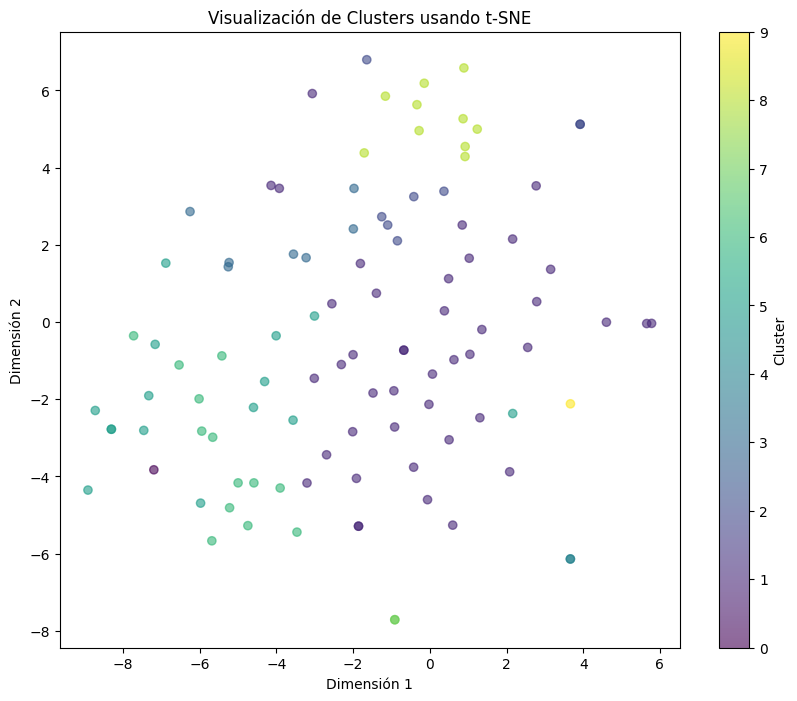


Cluster 0:
- A través de un mensaje compartido en su cuenta oficial de la red social X, el senador Iván Cepeda expresó su respaldo a varios funcionarios del Gobierno de Gustavo Petro, incluyendo a Jorge Rojas, dir...


Cluster 1:
- Con mucha intensidad, y con Estados Unidos como eje central, han transcurrido los primeros días de Laura Sarabia al frente de la Cancillería. A nueve días de haberse posesionado, la canciller ha estru...

- La televisación del consejo de ministros el pasado martes mostró muchas realidades que apenas eran versiones de prensa sobre el gabinete, una de ellas era la ruptura entre el presidente Gustavo Petro ...

- El presidente Gustavo Petro aseguró a través de su cuenta de X que Vanti está "especulando" respecto al anuncio del aumento en el precio de las facturas de gas hasta en un 36 por ciento. "Están especu...


Cluster 2:
- La inauguración de una nueva ruta marítima comercial entre Buenaventura y Shanghái, y la conmemoración de los 45 años de relaciones bi

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# 1. Cargar los embeddings previamente generados
embeddings = np.load("embeddings_noticias.npy")

# 2. Reducción de dimensionalidad con PCA
pca = PCA(n_components=50)  # Reducir a 50 dimensiones
embeddings_reduced = pca.fit_transform(embeddings)

# 3. Aplicación de clustering con K-Means
num_clusters = 10  # Ajusta el número de clusters según sea necesario
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_reduced)

# 4. Agregar los clusters al DataFrame de noticias (asegúrate de que df_noticias está cargado)
df_noticias["cluster"] = clusters

# 5. Guardar los resultados del clustering en un archivo de texto
with open("cluster_results.txt", "w", encoding="utf-8") as file:
    for i, row in df_noticias.iterrows():
        file.write(f"Cluster {row['cluster']}:\n{row['text'][:200]}...\n\n")  # Solo mostramos un fragmento del texto

# 6. Reducción a 2 dimensiones para visualización con t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_reduced)

# 7. Graficar los clusters usando t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Cluster")
plt.title("Visualización de Clusters usando t-SNE")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.show()

# 8. Análisis e interpretación de los clusters
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    cluster_samples = df_noticias[df_noticias["cluster"] == cluster_id]["text"].tolist()
    for sample in cluster_samples[:3]:  # Mostrar los primeros 3 textos del cluster
        print(f"- {sample[:200]}...\n")  # Mostrar solo un fragmento


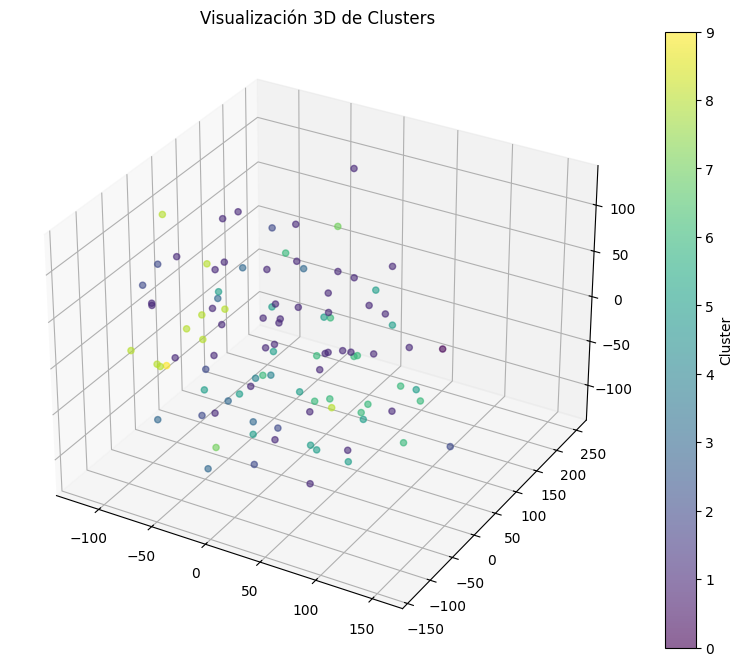

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.manifold import TSNE

# Reducir embeddings a 3 dimensiones
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_reduced)

# Graficar en 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=clusters, cmap="viridis", alpha=0.6)
plt.colorbar(scatter, label="Cluster")
ax.set_title("Visualización 3D de Clusters")
plt.show()


<ipython-input-19-baebcb6a57e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_noticias["cluster"], palette="viridis")


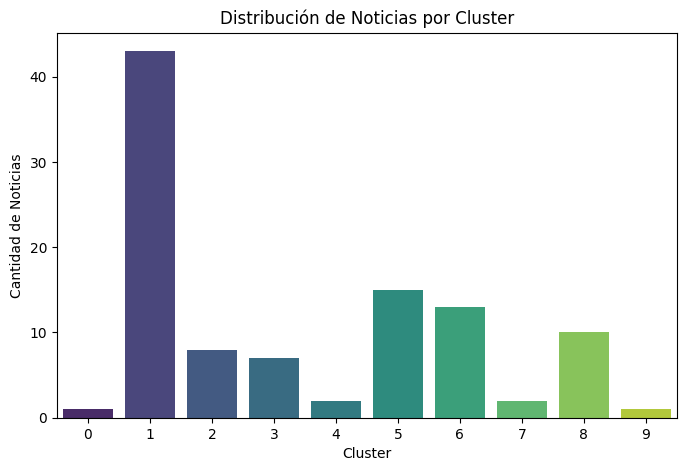

In [19]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=df_noticias["cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Noticias")
plt.title("Distribución de Noticias por Cluster")
plt.show()
